# 1. Load libraries

In [ ]:
pip install -U scikit-learn scipy matplotlib

In [ ]:
pip install seaborn

In [31]:
# Scikit-learn (formerly scikits.learn and also known as sklearn) is a free 
# software machine learning library for the Python programming language. 
# It features various classification, regression and clustering algorithms, 
# and is designed to interoperate with the Python numerical and scientific 
# libraries NumPy and SciPy. (from wiki)

from sklearn import linear_model
from sklearn import tree
from sklearn import ensemble

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.inspection import permutation_importance

# common visualization module
from matplotlib import pyplot as plt
import thinkplot
import plotly.express as px
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf

import plotly.graph_objects as go

import statsmodels.api as sm
from patsy import dmatrices

from scipy import stats

# numeric library
import numpy as np

import os
import pandas as pd
from time import time as timer
import tarfile

%matplotlib inline
from matplotlib import animation
from IPython.display import HTML
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from patsy import dmatrices

# 2. Load Data

In [2]:
# Insert Data the data. Data is web-scrapped from understat.com and locally stored, named 'understat_test'. The data consists of information about the 5 biggest footbal clubs in Europe.
df_all=pd.read_csv(r'C:\Users\I0331193\Documents\CAS\DataFiles\understat_test.csv', infer_datetime_format=True, parse_dates=[13],index_col=[13])

In [4]:
#description of loaded data
round(df_all.describe(),2)

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff
count,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,...,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00,204.00
mean,2016.50,2.35,0.81,2.21,0.73,11.72,3.16,2.59,0.73,2.25,...,1.48,7.33,172.75,24.90,23.84,401.89,21.31,-0.25,0.07,-0.17
std,1.71,1.15,0.61,1.10,0.56,5.20,2.50,1.70,0.93,0.68,...,1.29,3.08,60.60,6.42,15.81,66.31,9.30,1.31,0.73,0.91
min,2014.00,0.10,0.00,0.10,0.00,1.00,0.00,0.00,0.00,0.29,...,-1.91,2.11,50.00,10.00,5.06,240.00,2.00,-4.38,-2.44,-2.50
25%,2015.00,1.50,0.33,1.47,0.29,8.00,1.00,1.00,0.00,1.87,...,0.55,5.06,129.00,21.00,14.80,355.75,14.00,-1.09,-0.30,-0.66
50%,2016.50,2.20,0.66,2.03,0.60,11.50,3.00,2.00,0.50,2.42,...,1.37,6.75,161.50,24.00,20.36,404.00,20.00,-0.19,0.22,-0.21
75%,2018.00,3.10,1.09,2.93,0.98,15.00,4.25,4.00,1.00,2.81,...,2.32,8.79,207.50,30.00,28.39,444.25,27.00,0.72,0.52,-0.01
max,2019.00,5.94,3.00,5.84,3.00,32.00,14.00,8.00,5.00,3.00,...,5.30,19.00,405.00,46.00,152.00,562.00,65.00,2.41,1.76,2.36


## 2.1 Data Cleaning

In [3]:
#Convert the 'home_away' column into categorical columns by using 'get_dummies' method. You want to use this information about away and home games as a feature
g_status=pd.get_dummies(df_all['h_a'],drop_first=True)

# Drop the home_away coulmn
df_all=df_all.drop('h_a',axis=1)

# Add the dummy-states independent variables and rename the new column as you want. Here 'Game_Status' is chosen
df_all=pd.concat([df_all,g_status],axis=1)
df_all=df_all.rename(columns={'h':'Game_Status'})

#Check if all worked by loading the adjusted dataframe
df_all

,league,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,...,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,team,xG_diff,xGA_diff,xpts_diff,Game_Status
date,,,,,,,,,,,,,,,,,,,,,
2014-08-22,Bundesliga,2014,2.57012,1.198420,2.57012,1.198420,5,4,2,1,...,231,24,21.850000,437,20,Bayern Munich,0.57012,0.198420,-0.6514,1
2014-08-30,Bundesliga,2014,1.50328,1.307950,1.50328,1.307950,10,1,1,1,...,195,41,17.695652,407,23,Bayern Munich,0.50328,0.307950,0.5143,0
2014-09-13,Bundesliga,2014,1.22987,0.310166,1.22987,0.310166,13,3,2,0,...,167,33,16.961538,441,26,Bayern Munich,-0.77013,0.310166,-0.8412,1
2014-09-20,Bundesliga,2014,1.03519,0.203118,1.03519,0.203118,6,2,0,0,...,115,26,9.446809,444,47,Bayern Munich,1.03519,0.203118,1.1367,0
2014-09-23,Bundesliga,2014,3.48286,0.402844,3.48286,0.402844,23,2,4,0,...,170,40,44.800000,448,10,Bayern Munich,-0.51714,0.402844,-0.0713,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-06,Bundesliga,2019,2.65130,0.768558,2.65130,0.768558,11,3,4,2,...,352,31,12.548387,389,31,Bayern Munich,-1.34870,-1.231442,-0.4318,0
2020-06-13,Bundesliga,2019,1.77878,0.983991,1.77878,0.983991,8,4,2,1,...,405,30,20.687500,331,16,Bayern Munich,-0.22122,-0.016009,-1.0049,1
2020-06-16,Bundesliga,2019,1.33112,0.274502,1.33112,0.274502,15,4,1,0,...,261,33,25.000000,325,13,Bayern Munich,0.33112,0.274502,-0.7094,0


In [4]:
# Add a few derived regression variables. In this case we are tranforming the date column into 'Day', 'Month' & 'Day_of_Week'"M1 Day 1.ipynb"
# the column date is put as the index, which helps to better compare the results from the test and train dataset 
ds = df_all.index.to_series()
df_all['Month'] = ds.dt.month
df_all['Day_of_Week'] = ds.dt.dayofweek
df_all['Day'] = ds.dt.day
df_all['Month']

date
2014-08-22    8
2014-08-30    8
2014-09-13    9
2014-09-20    9
2014-09-23    9
             ..
2020-06-06    6
2020-06-13    6
2020-06-16    6
2020-06-20    6
2020-06-27    6
Name: Month, Length: 204, dtype: int64

# 3. Plots

In order to get a better (visual) understanding of the dataframe, following few pots from the loaded dataset

In [118]:
#Goal distribution over time
fig = go.Figure([go.Histogram(x=df_all.index, y=df_all['scored'])])
fig.show()

Text(0.5, 0, 'Number of Goals [-]')

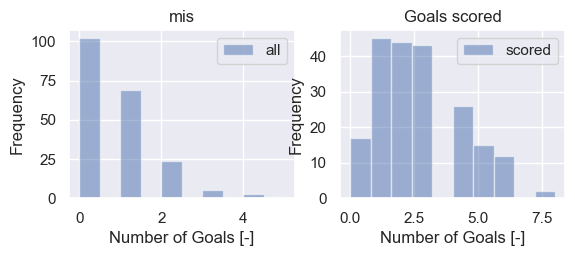

In [120]:
# Use a Histogram Plot to show the goal distribution per game per team
plt.subplot(2,2,1)
plt.title('mis')
df_all['missed'].plot(kind="hist",fill=True,alpha=0.5,histtype='bar', label='all')
plt.legend()
plt.xlabel('Number of Goals [-]')

plt.subplot(2,2,2)
plt.title('Goals scored')
df_all['scored'].plot(kind="hist",fill=True,alpha=0.5,histtype='bar', label='scored')
plt.legend()
plt.xlabel('Number of Goals [-]')

Text(0.5, 0, 'Goals[-]')

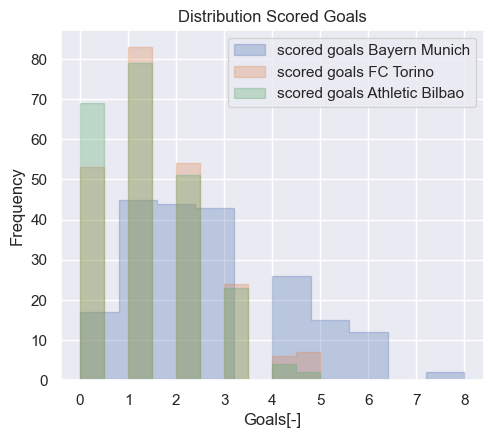

In [17]:
# Plot the goals distribution per team per match of different teams in order to show the (potential) difference between the teams
df_bay=df_all[df_all['team']=='Bayern Munich']
df_tor=df_all[df_all['team']=='Torino']
df_bil=df_all[df_all['team']=='Athletic Club']

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
datasets = [df_bay['scored'],df_tor['scored'],df_bil['scored']]
dataset_labels = ['scored goals Bayern Munich', 'scored goals FC Torino','scored goals Athletic Bilbao'] 
plt.title('Distribution Scored Goals')

i=0
for dataset in datasets[0:3]:
    dataset.plot(kind="hist",fill=True,alpha=0.3,histtype='step',label=dataset_labels[i]) #,label=dataset_labels[i]
    #print('%10s %1.2f ' % (datasets_labels[i],p))
    i+=1

plt.legend()
plt.xlabel('Goals[-]')

C:\Users\I0331193\AppData\Local\Temp\ipykernel_20784\3737430289.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0.5, 0, 'year'),
 Text(2.5, 0, 'xGA'),
 Text(4.5, 0, 'npxGA'),
 Text(6.5, 0, 'deep_allowed'),
 Text(8.5, 0, 'missed'),
 Text(10.5, 0, 'wins'),
 Text(12.5, 0, 'loses'),
 Text(14.5, 0, 'npxGD'),
 Text(16.5, 0, 'ppda_att'),
 Text(18.5, 0, 'oppda_coef'),
 Text(20.5, 0, 'oppda_def'),
 Text(22.5, 0, 'xGA_diff'),
 Text(24.5, 0, 'Total_Goals_per_Game'),
 Text(26.5, 0, 'Day_of_Week')]

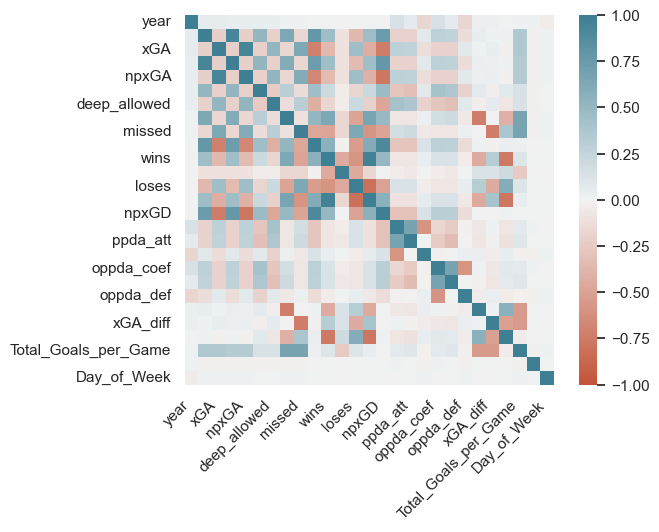

In [21]:
# Plot a confusion matrix  with the method from seaborn

# define correlation matrix
corr=df_all.corr()

#create heatmap in order to show visualdifferences in the confusion matrix
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

# 4. The Poisson Regression Model

In this section, the loaded dataframe will be split into train and test dataset and is used in a Poisson regression model from statsmodels. 

In [ ]:
pip install statsmodels 

In [110]:
# Split the data into training and test sample. The split is 0.8 training and 0.2 test
mask = np.random.rand(len(df_all)) < 0.8
df_train = df_all[mask]
df_test = df_all[~mask]

#print the shape / length of the two sample size
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=171
Testing data set length=33


In [113]:
# Setup the regression expression in patsy notation. We are telling patsy that 'scored' is our dependent variable and
# it depends on the regression variables: Xi
# As the features applied changes, following multiple feature combinatins are listed

#expr='''scored ~ xG + ppda_att + oppda_att'''
#expr='''scored ~ xG+ deep + missed + ppda_att + oppda_att + Month + Game_Status'''
#expr='''scored ~ xG + deep + missed + ppda_att + oppda_att + ppda_def + oppda_def + Month + Day_of_Week + Day + Game_Status'''
expr='''scored ~ deep + missed + deep_allowed + ppda_att + ppda_def'''

#Set up the X and y matrices for train and test samples
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [114]:
#Using the statsmodels GLM class, train the Poisson regression model on the training data set.
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

#Print the training summary.
print(poisson_training_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 scored   No. Observations:                  171
Model:                            GLM   Df Residuals:                      165
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -305.13
Date:                Wed, 23 Nov 2022   Deviance:                       178.93
Time:                        15:09:35   Pearson chi2:                     166.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1715
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8658      0.252      3.434   

In [ ]:
#Make some predictions on the test data set. Variable 'poisson_predictions' consists of the predicted scored goals of the test dataset when applying the model defined by the training dataset
poisson_predictions = poisson_training_results.get_prediction(X_test)

#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

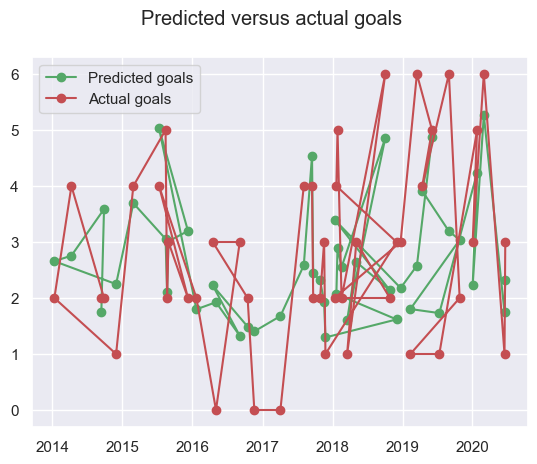

In [108]:
#Visualize the the differences between the model and the actual data

#define the predicted and the actual goals
predicted_goals=predictions_summary_frame['mean']
actual_goals = y_test['scored']

#Mlot the predicted counts versus the actual counts for the test data.
fig = plt.figure()
fig.suptitle('Predicted versus actual goals')
predicted, = plt.plot(X_test.index, predicted_goals, 'go-', label='Predicted goals')
actual, = plt.plot(X_test.index, actual_goals, 'ro-', label='Actual goals')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 640x480 with 0 Axes>

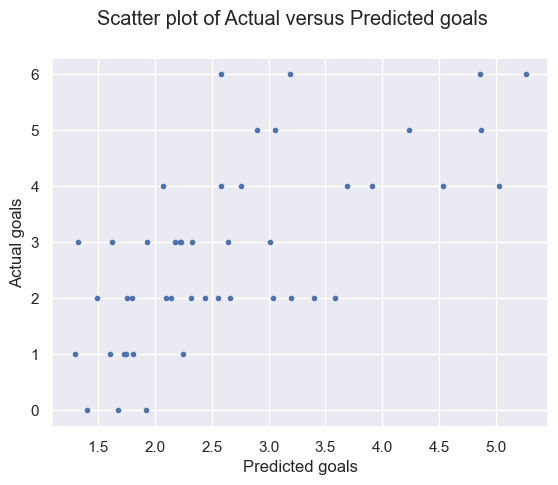

In [109]:
#Show scatter plot of Actual versus Predicted counts
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted goals')
plt.scatter(x=predicted_goals, y=actual_goals, marker='.')
plt.xlabel('Predicted goals', )
plt.ylabel('Actual goals')
plt.show()

# 5. Probability of certain scored goals

In [131]:
# get the predicted goals
test_predict= poisson_training_results.predict()

In [2]:
#define a dataframe that consists of columns = number of goals, rows = according probability

#define up to how many goals you want to dataframe to show
counts = np.arange(6)

#calculate the probability
predict_prob = stats.poisson.pmf(counts, np.asarray(test_predict)[:, None])
results = pd.DataFrame(predict_prob)
results

NameError: name 'np' is not defined

In [1]:
#calculate probability for certain game outcomes

#Probability that team x scores at least one goal:
plus0 = 1- results[0].mean()

#Probability that team x scores more than one goal:
plus1 = 1- results[0].mean()-results[1].mean()
plus2 = 1- results[0].mean()-results[1].mean()-results[2].mean()

NameError: name 'results' is not defined